In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [2]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()


In [3]:
df.dropna(subset=['educacion'], inplace=True)



In [4]:
df.isnull().sum()
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")



In [5]:
df.isnull().sum()
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

# visualizaremos los datos teniendo en cuenta los que contengan "si" en la columna "target"

In [6]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1746,1747,57,housemaid,casado,primaria,no,2234,no,no,Sin Información,201,11-jun-2021,5,-1,0,Sin Información,no
1793,1794,29,blue-collar,soltero,universitarios,no,455,no,no,fijo,214,27-may-2021,2,36,1,exito,si
24493,24494,43,services,casado,secundaria/superiores,no,41,si,si,Sin Información,127,5-may-2021,2,-1,0,Sin Información,no
33700,33701,40,technician,casado,secundaria/superiores,no,335,si,no,Sin Información,140,2-jun-2021,3,-1,0,Sin Información,no
31760,31761,33,unemployed,soltero,secundaria/superiores,no,177,no,no,Sin Información,75,8-may-2021,4,-1,0,Sin Información,no


In [7]:
df_target_si =  df[df['target'] == "si"]
df_target_si.sample(3)
df_target_si = df_target_si.drop(['ID', 'tipo_contacto', 'fecha_contacto', 'campaign', 'contactos_anteriores', 'resultado_campanas_anteriores'], axis=1, inplace=False)

df_target_si.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,duracion,tiempo_transcurrido,target
31050,40,technician,casado,universitarios,no,11766,si,no,218,242,si
42404,39,management,casado,universitarios,no,1738,si,no,633,358,si
36479,64,retired,casado,primaria,no,12067,no,no,367,92,si


In [8]:
# Total de personas con saldo igual a 0
total_saldo_0 = df_target_si[df_target_si['saldo'] == 0].shape[0]

# Total de personas con saldo negativo
total_saldo_negativo = df_target_si[df_target_si['saldo'] < 0].shape[0]

# Total de personas con saldo positivo
total_saldo_positivo = df_target_si[df_target_si['saldo'] > 0].shape[0]

print("Total de personas con saldo igual a 0:", total_saldo_0)
print("Total de personas con saldo negativo:", total_saldo_negativo)
print("Total de personas con saldo positivo:", total_saldo_positivo)

Total de personas con saldo igual a 0: 281
Total de personas con saldo negativo: 203
Total de personas con saldo positivo: 4457


In [9]:
# Vamos averiguar de nuestra base de datos con "target_si" y dependiendo de los saldos, cuanto tiempo de "duracion" promedio tuvieron


# Obtener valores mínimo, máximo y promedio de duración para personas con saldo igual a 0
min_duracion_target_si_saldo_0 = df_target_si[df_target_si['saldo'] == 0]['duracion'].min()
max_duracion_target_si_saldo_0 = df_target_si[df_target_si['saldo'] == 0]['duracion'].max()
promedio_duracion_target_si_saldo_0 = df_target_si[df_target_si['saldo'] == 0]['duracion'].mean()

# Obtener valores mínimo, máximo y promedio de duración para personas con saldo negativo
min_duracion_target_si_saldo_negativo = df_target_si[df_target_si['saldo'] < 0]['duracion'].min()
max_duracion_target_si_saldo_negativo = df_target_si[df_target_si['saldo'] < 0]['duracion'].max()
promedio_duracion_target_si_saldo_negativo = df_target_si[df_target_si['saldo'] < 0]['duracion'].mean()

# Obtener valores mínimo, máximo y promedio de duración para personas con saldo positivo
min_duracion_target_si_saldo_positivo = df_target_si[df_target_si['saldo'] > 0]['duracion'].min()
max_duracion_target_si_saldo_positivo = df_target_si[df_target_si['saldo'] > 0]['duracion'].max()
promedio_duracion_target_si_saldo_positivo = df_target_si[df_target_si['saldo'] > 0]['duracion'].mean()

print("Valores mínimos, máximos y promedio de duración para personas con saldo igual a 0:")
print("Mínimo:", min_duracion_target_si_saldo_0)
print("Máximo:", max_duracion_target_si_saldo_0)
print("Promedio:", promedio_duracion_target_si_saldo_0)
print()

print("Valores mínimos, máximos y promedio de duración para personas con saldo negativo:")
print("Mínimo:", min_duracion_target_si_saldo_negativo)
print("Máximo:", max_duracion_target_si_saldo_negativo)
print("Promedio:", promedio_duracion_target_si_saldo_negativo)
print()

print("Valores mínimos, máximos y promedio de duración para personas con saldo positivo:")
print("Mínimo:", min_duracion_target_si_saldo_positivo)
print("Máximo:", max_duracion_target_si_saldo_positivo)
print("Promedio:", promedio_duracion_target_si_saldo_positivo)

Valores mínimos, máximos y promedio de duración para personas con saldo igual a 0:
Mínimo: 80
Máximo: 1975
Promedio: 573.6192170818505

Valores mínimos, máximos y promedio de duración para personas con saldo negativo:
Mínimo: 63
Máximo: 3253
Promedio: 788.2463054187192

Valores mínimos, máximos y promedio de duración para personas con saldo positivo:
Mínimo: 8
Máximo: 3881
Promedio: 527.6479694862015


In [10]:
# visualizaremos los datos teniendo en cuenta los que contengan "no" en la columna "target"
df_target_no =  df[df['target'] == "no"]
df_target_no.sample(3)


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
18926,18927,33,management,casado,universitarios,no,641,si,no,movil,347,13-aug-2021,2,-1,0,Sin Información,no
23092,23093,31,management,casado,universitarios,no,2667,si,no,movil,73,2-mar-2021,2,-1,0,Sin Información,no
17097,17098,33,services,soltero,secundaria/superiores,no,239,si,no,movil,101,15-may-2021,2,-1,0,Sin Información,no


In [11]:
df_target_no = df_target_no.drop(['ID', 'tipo_contacto', 'fecha_contacto', 'campaign', 'contactos_anteriores', 'resultado_campanas_anteriores'], axis=1, inplace=False)

df_target_no.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,duracion,tiempo_transcurrido,target
38892,38,blue-collar,soltero,secundaria/superiores,no,-1,si,no,72,-1,no
39616,34,technician,soltero,universitarios,no,2195,no,no,490,-1,no
34550,46,technician,casado,secundaria/superiores,no,2098,no,no,110,-1,no


In [12]:
# Total de personas con saldo igual a 0
total_saldo_0 = df_target_no[df_target_no['saldo'] == 0].shape[0]

# Total de personas con saldo negativo
total_saldo_negativo = df_target_no[df_target_no['saldo'] < 0].shape[0]

# Total de personas con saldo positivo
total_saldo_positivo = df_target_no[df_target_no['saldo'] > 0].shape[0]

print("Total de personas con saldo igual a 0:", total_saldo_0)
print("Total de personas con saldo negativo:", total_saldo_negativo)
print("Total de personas con saldo positivo:", total_saldo_positivo)

Total de personas con saldo igual a 0: 3047
Total de personas con saldo negativo: 3361
Total de personas con saldo positivo: 31097


In [13]:
# Vamos averiguar de nuestra base de datos con "target_no" y dependiendo de los saldos, cuanto tiempo de "duracion" promedio tuvieron

# Obtener valores mínimo, máximo y promedio de duración para personas con saldo igual a 0
min_duracion_target_no_saldo_0 = df_target_no[df_target_no['saldo'] == 0]['duracion'].min()
max_duracion_target_no_saldo_0 = df_target_no[df_target_no['saldo'] == 0]['duracion'].max()
promedio_duracion_target_no_saldo_0 = df_target_no[df_target_no['saldo'] == 0]['duracion'].mean()

# Obtener valores mínimo, máximo y promedio de duración para personas con saldo negativo
min_duracion_target_no_saldo_negativo = df_target_no[df_target_no['saldo'] < 0]['duracion'].min()
max_duracion_target_no_saldo_negativo = df_target_no[df_target_no['saldo'] < 0]['duracion'].max()
promedio_duracion_target_no_saldo_negativo = df_target_no[df_target_no['saldo'] < 0]['duracion'].mean()

# Obtener valores mínimo, máximo y promedio de duración para personas con saldo positivo
min_duracion_target_no_saldo_positivo = df_target_no[df_target_no['saldo'] > 0]['duracion'].min()
max_duracion_target_no_saldo_positivo = df_target_no[df_target_no['saldo'] > 0]['duracion'].max()
promedio_duracion_target_no_saldo_positivo = df_target_no[df_target_no['saldo'] > 0]['duracion'].mean()

print("Valores mínimos, máximos y promedio de duración para personas con saldo igual a 0:")
print("Mínimo:", min_duracion_target_no_saldo_0)
print("Máximo:", max_duracion_target_no_saldo_0)
print("Promedio:", promedio_duracion_target_no_saldo_0)
print()

print("Valores mínimos, máximos y promedio de duración para personas con saldo negativo:")
print("Mínimo:", min_duracion_target_no_saldo_negativo)
print("Máximo:", max_duracion_target_no_saldo_negativo)
print("Promedio:", promedio_duracion_target_no_saldo_negativo)
print()

print("Valores mínimos, máximos y promedio de duración para personas con saldo positivo:")
print("Mínimo:", min_duracion_target_no_saldo_positivo)
print("Máximo:", max_duracion_target_no_saldo_positivo)
print("Promedio:", promedio_duracion_target_no_saldo_positivo)



Valores mínimos, máximos y promedio de duración para personas con saldo igual a 0:
Mínimo: 3
Máximo: 3025
Promedio: 215.41581883820152

Valores mínimos, máximos y promedio de duración para personas con saldo negativo:
Mínimo: 4
Máximo: 2053
Promedio: 221.6227313299613

Valores mínimos, máximos y promedio de duración para personas con saldo positivo:
Mínimo: 0
Máximo: 4918
Promedio: 221.58047400070745


In [14]:
print("Valores mínimos, máximos y promedio de duración para personas con saldo igual a 0:")
print("Mínimo de target 'NO':", min_duracion_target_no_saldo_0)
print("Máximo de target 'NO':", max_duracion_target_no_saldo_0)
print("Promedio de target 'NO':", promedio_duracion_target_no_saldo_0)
print("Mínimo de target 'SI':", min_duracion_target_si_saldo_0)
print("Máximo de target 'SI':", max_duracion_target_si_saldo_0)
print("Promedio de target 'SI':", promedio_duracion_target_si_saldo_0)
print()

print("Valores mínimos, máximos y promedio de duración para personas con saldo negativo:")
print("Mínimo de target 'NO':", min_duracion_target_no_saldo_negativo)
print("Máximo de target 'NO':", max_duracion_target_no_saldo_negativo)
print("Promedio de target 'NO':", promedio_duracion_target_no_saldo_negativo)
print("Mínimo de target 'SI':", min_duracion_target_si_saldo_negativo)
print("Máximo de target 'SI':", max_duracion_target_si_saldo_negativo)
print("Promedio de target 'SI':", promedio_duracion_target_si_saldo_negativo)
print()

print("Valores mínimos, máximos y promedio de duración para personas con saldo positivo:")
print("Mínimo de target 'NO':", min_duracion_target_no_saldo_positivo)
print("Máximo de target 'NO':", max_duracion_target_no_saldo_positivo)
print("Promedio de target 'NO':", promedio_duracion_target_no_saldo_positivo)
print("Mínimo de target 'SI':", min_duracion_target_si_saldo_positivo)
print("Máximo de target 'SI':", max_duracion_target_si_saldo_positivo)
print("Promedio de target 'SI':", promedio_duracion_target_si_saldo_positivo)

Valores mínimos, máximos y promedio de duración para personas con saldo igual a 0:
Mínimo de target 'NO': 3
Máximo de target 'NO': 3025
Promedio de target 'NO': 215.41581883820152
Mínimo de target 'SI': 80
Máximo de target 'SI': 1975
Promedio de target 'SI': 573.6192170818505

Valores mínimos, máximos y promedio de duración para personas con saldo negativo:
Mínimo de target 'NO': 4
Máximo de target 'NO': 2053
Promedio de target 'NO': 221.6227313299613
Mínimo de target 'SI': 63
Máximo de target 'SI': 3253
Promedio de target 'SI': 788.2463054187192

Valores mínimos, máximos y promedio de duración para personas con saldo positivo:
Mínimo de target 'NO': 0
Máximo de target 'NO': 4918
Promedio de target 'NO': 221.58047400070745
Mínimo de target 'SI': 8
Máximo de target 'SI': 3881
Promedio de target 'SI': 527.6479694862015


De los datos proporcionados, podemos extraer varias observaciones y posibles patrones:

1. **Duración de llamadas mínima, máxima y promedio:**
   - Observamos que, en general, la duración de las llamadas para clientes a los que se les quiere vender la oportunidad de plazos fijos es considerablemente mayor para aquellos con saldo negativo y saldo positivo en comparación con aquellos con saldo igual a 0€. Esto podría indicar que las llamadas a clientes con saldos negativos o positivos pueden requerir más tiempo para persuadirlos o discutir sus opciones financieras en comparación con aquellos con saldo igual a 0€.

2. **Diferencias entre los grupos 'target_si' y 'target_no':**
   - La duración promedio de las llamadas para clientes que eventualmente crearon plazos fijos ('target_si') es más alta en comparación con aquellos que no lo hicieron ('target_no'). Esto sugiere que los clientes que finalmente se convierten en titulares de plazos fijos pueden requerir un mayor tiempo de interacción o persuasión durante las llamadas.
   - Además, la duración mínima y máxima de las llamadas también es más alta en el grupo 'target_si', lo que podría indicar una mayor variabilidad en la duración de las interacciones con clientes que eventualmente adquieren plazos fijos.

3. **Diferencias entre clientes con saldo positivo, negativo y saldo igual a 0€:**
   - La duración promedio de las llamadas para clientes con saldo negativo es la más alta, seguida por los clientes con saldo positivo y aquellos con saldo igual a 0€. Esto podría reflejar la necesidad de una mayor explicación o persuasión para clientes con problemas financieros (saldo negativo) en comparación con aquellos con un saldo positivo o nulo.
   - Además, la variabilidad en la duración de las llamadas, como se refleja en los valores mínimo y máximo, también es más alta para clientes con saldo negativo, lo que podría indicar una mayor complejidad en la interacción con este grupo.



En resumen, estos datos sugieren que la duración de las llamadas telefónicas puede ser un indicador útil para diferenciar entre clientes que eventualmente adquieren plazos fijos y aquellos que no lo hacen. Además, la situación financiera de los clientes, medida por su saldo en la cuenta, puede influir en la duración y el resultado de las llamadas de venta.
**Informe sobre Optimización de Llamadas de Venta y Estrategias de Call Center**


---

**Introducción**

En el mundo actual, donde la competencia es feroz y la eficiencia es crucial, es fundamental para nuestra empresa encontrar formas innovadoras de maximizar nuestro rendimiento en ventas y mejorar la experiencia del cliente. En este informe, presentaremos un análisis detallado de los datos de llamadas de ventas, identificaremos patrones significativos y propondremos estrategias disruptivas para mejorar nuestras operaciones de call center.

**Análisis de Datos**

A través del análisis de los datos de duración de las llamadas de ventas para clientes con diferentes perfiles financieros, hemos identificado varios patrones clave que pueden impulsar el rendimiento económico de nuestra empresa:

1. **Duración de las Llamadas y Conversión:**
   - Hemos observado que la duración promedio de las llamadas para clientes que eventualmente adquieren plazos fijos es significativamente mayor que para aquellos que no lo hacen. Esto sugiere que una mayor inversión de tiempo y esfuerzo en las interacciones con clientes tiene el potencial de aumentar las tasas de conversión y, por lo tanto, los ingresos.

2. **Enfoque en Clientes con Saldo Negativo:**
   - Los clientes con saldo negativo tienden a requerir más tiempo y atención durante las llamadas. Sin embargo, este grupo también muestra una mayor variabilidad en la duración de las llamadas. Al enfocar nuestros esfuerzos en este segmento, podemos ofrecer soluciones financieras personalizadas que podrían resultar en una mayor retención de clientes y mayores ganancias.

**Estrategias Recomendadas**

Basándonos en nuestro análisis de datos y en nuestra búsqueda de originalidad y disrupción, proponemos las siguientes estrategias para mejorar nuestras operaciones de call center:

1. **Personalización en las Interacciones:**
   - Implementar un enfoque más personalizado durante las llamadas, utilizando datos previos de los clientes para adaptar las ofertas y soluciones financieras de acuerdo con sus necesidades individuales.

2. **Entrenamiento en Habilidades de Venta y Comunicación:**
   - Brindar a nuestro equipo de call center entrenamiento adicional en habilidades de venta y comunicación, con un enfoque en la empatía y la capacidad de persuasión.

3. **Implementación de Tecnología Avanzada:**
   - Explorar soluciones tecnológicas innovadoras, como la inteligencia artificial y el análisis predictivo, para optimizar el enrutamiento de llamadas y mejorar la eficiencia en las interacciones con los clientes.

**Optimización de Recursos**

Para maximizar el impacto de nuestras estrategias, proponemos las siguientes acciones con respecto a la gestión de recursos:

1. **Aumento del Personal de Call Center:**
   - Dada la importancia de una interacción más personalizada y la necesidad de una mayor inversión de tiempo en clientes con saldo negativo, recomendamos considerar la contratación de personal adicional para nuestro equipo de call center. Proponemos evaluar la adición de al menos dos personas más por turno de 7 horas para garantizar una cobertura óptima y una atención adecuada a los clientes.

2. **Monitoreo y Retroalimentación Continua:**
   - Implementar un sistema de monitoreo y retroalimentación continua para evaluar el rendimiento del equipo de call center y realizar ajustes según sea necesario para mejorar la efectividad de las llamadas de ventas.

**Conclusión**

En resumen, al adoptar un enfoque más personalizado, capacitando a nuestro equipo en habilidades de venta y comunicación, y utilizando tecnología avanzada, podemos optimizar nuestras operaciones de call center y aumentar nuestras ventas. Además, al aumentar nuestro personal de call center y asegurar una cobertura adecuada, podemos garantizar una atención óptima a nuestros clientes y maximizar nuestro potencial de crecimiento económico.

Estamos comprometidos a innovar y liderar en nuestro sector, y creemos que estas estrategias nos ayudarán a mantenernos a la vanguardia de la competencia.

**Gracias por su atención.**


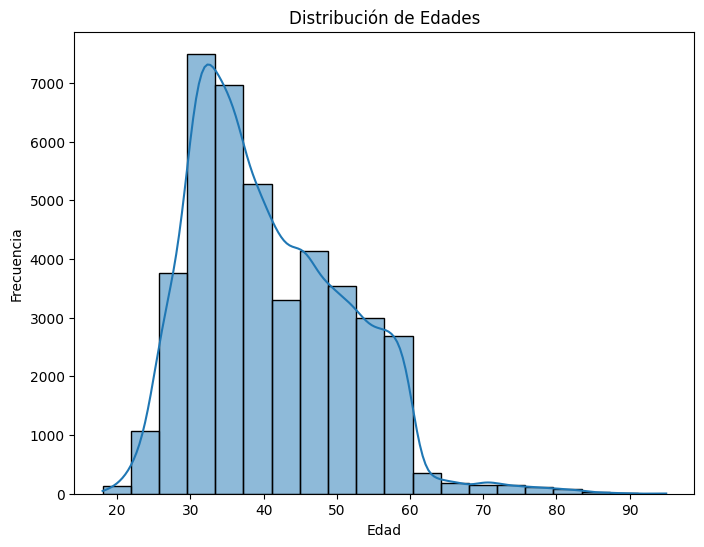

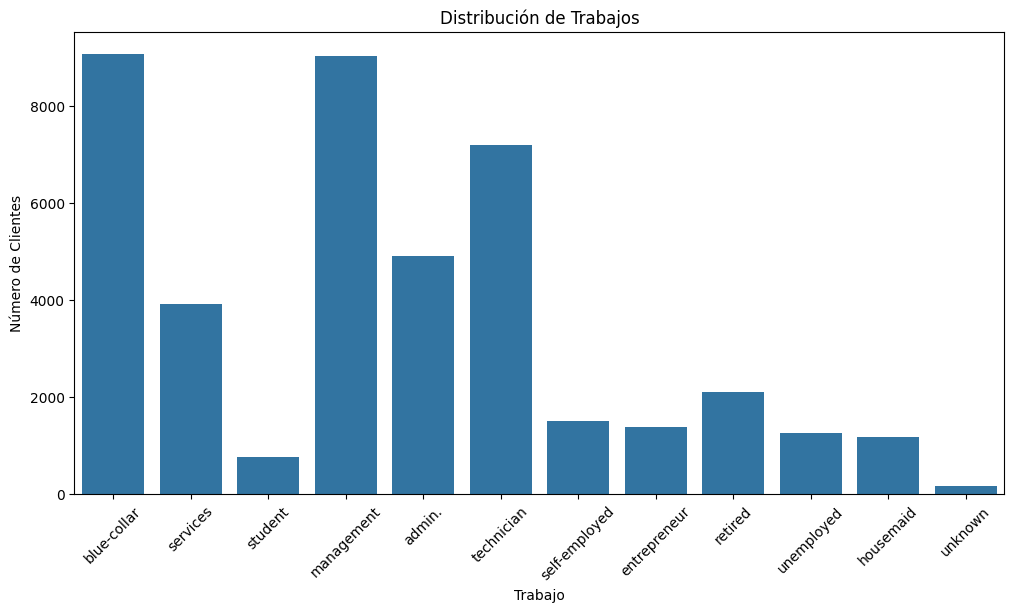

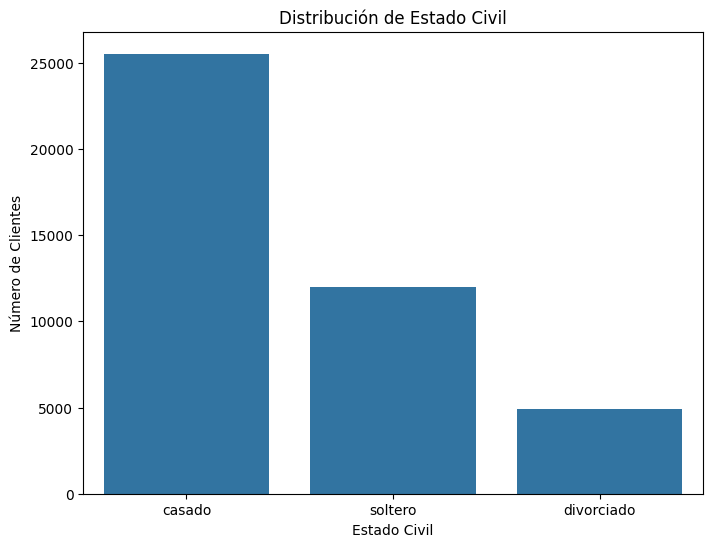

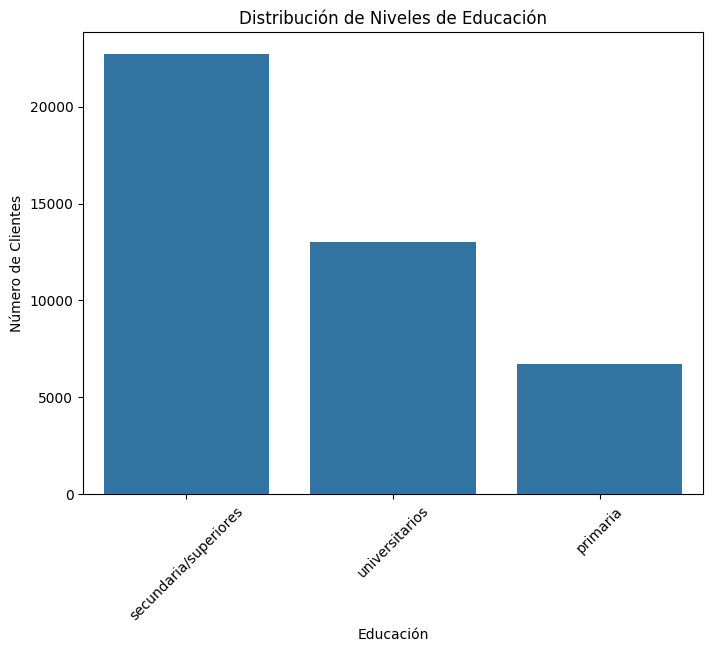

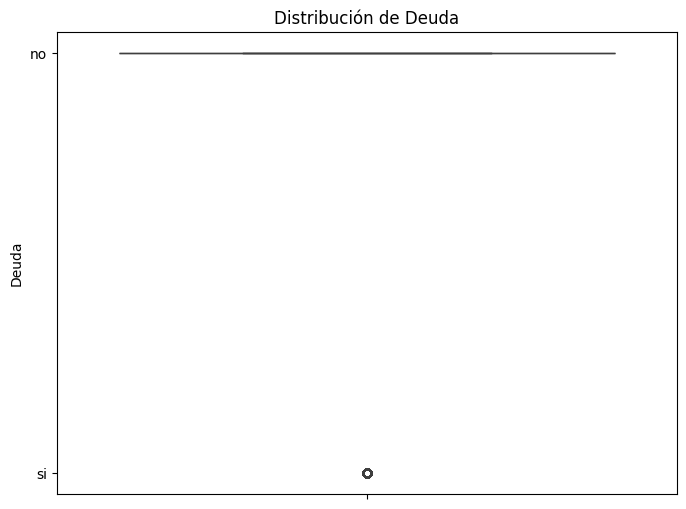

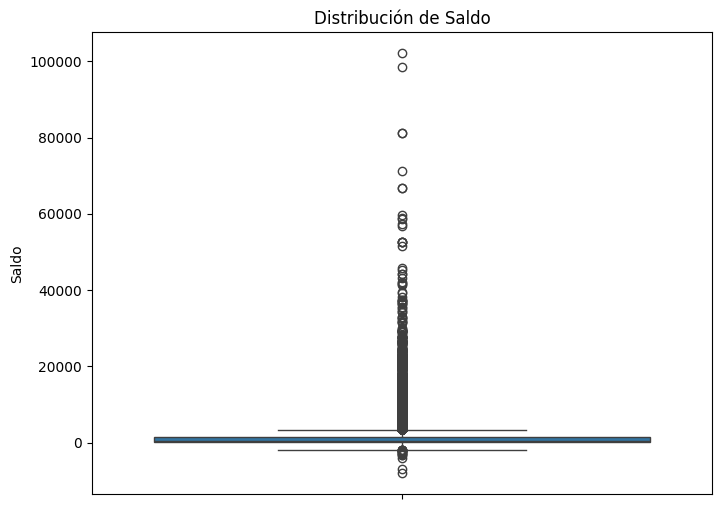

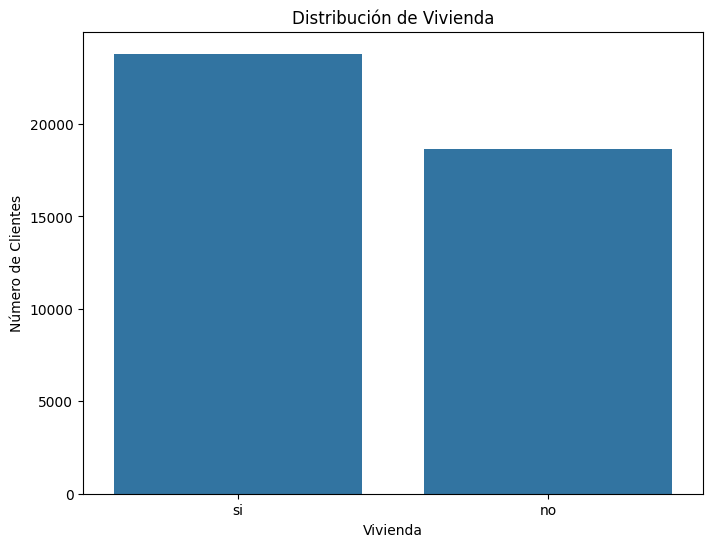

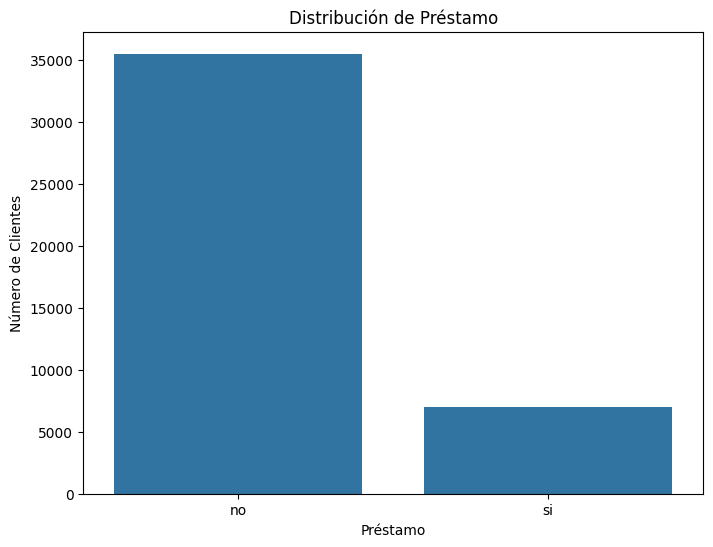

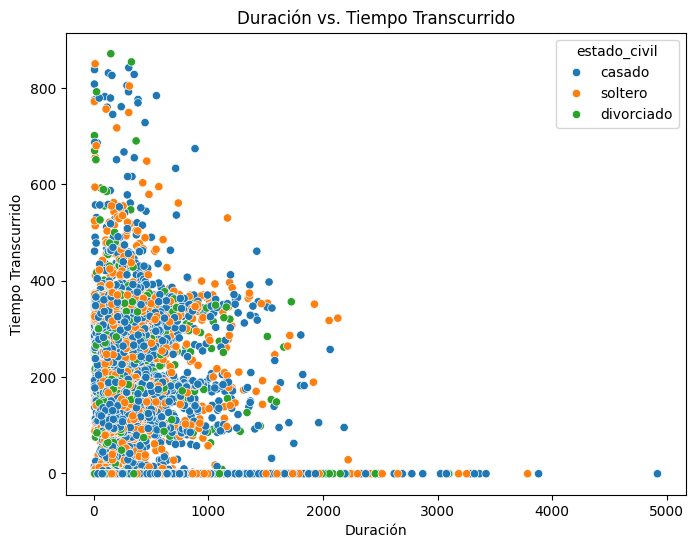

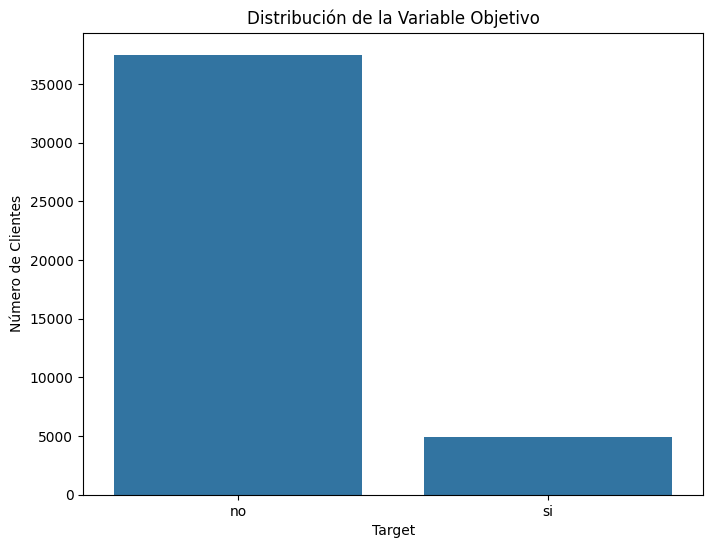

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df['edad'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de la distribución de trabajos
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='trabajo')
plt.title('Distribución de Trabajos')
plt.xlabel('Trabajo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras de la distribución de estado civil
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='estado_civil')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras de la distribución de educación
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='educacion')
plt.title('Distribución de Niveles de Educación')
plt.xlabel('Educación')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Gráfico de caja y bigotes de la deuda
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='deuda')
plt.title('Distribución de Deuda')
plt.ylabel('Deuda')
plt.show()

# Gráfico de caja y bigotes del saldo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='saldo')
plt.title('Distribución de Saldo')
plt.ylabel('Saldo')
plt.show()

# Gráfico de barras de la distribución de vivienda
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='vivienda')
plt.title('Distribución de Vivienda')
plt.xlabel('Vivienda')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras de la distribución de préstamo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='prestamo')
plt.title('Distribución de Préstamo')
plt.xlabel('Préstamo')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de dispersión entre duración y tiempo_transcurrido
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='duracion', y='tiempo_transcurrido', hue='estado_civil')
plt.title('Duración vs. Tiempo Transcurrido')
plt.xlabel('Duración')
plt.ylabel('Tiempo Transcurrido')
plt.show()

# Gráfico de barras de la distribución de la variable objetivo (target)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Target')
plt.ylabel('Número de Clientes')
plt.show()

# Buscaremos mas variables analizar dentro de mis "target_si"

In [15]:
df_target_si.sample(5)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,duracion,tiempo_transcurrido,target
3543,30,management,soltero,universitarios,no,8535,no,no,393,-1,si
1708,28,management,soltero,universitarios,no,12956,si,no,940,399,si
36072,30,management,soltero,universitarios,no,424,no,no,298,-1,si
38291,26,management,soltero,universitarios,no,1438,no,no,321,449,si
17293,60,retired,casado,secundaria/superiores,no,975,no,no,303,792,si


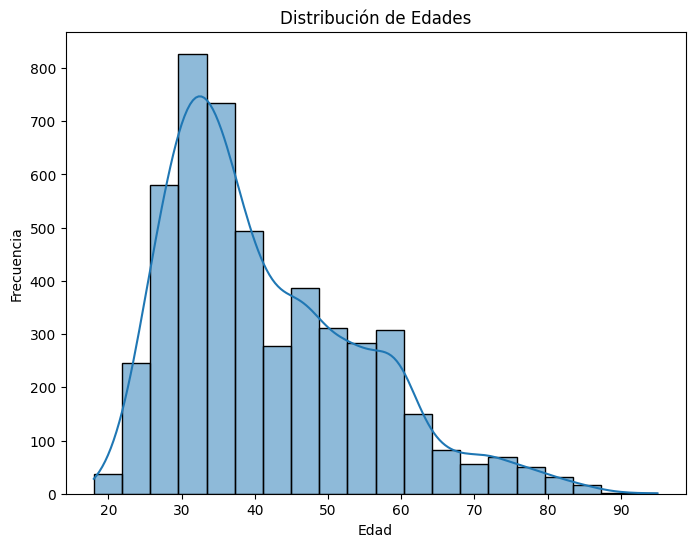

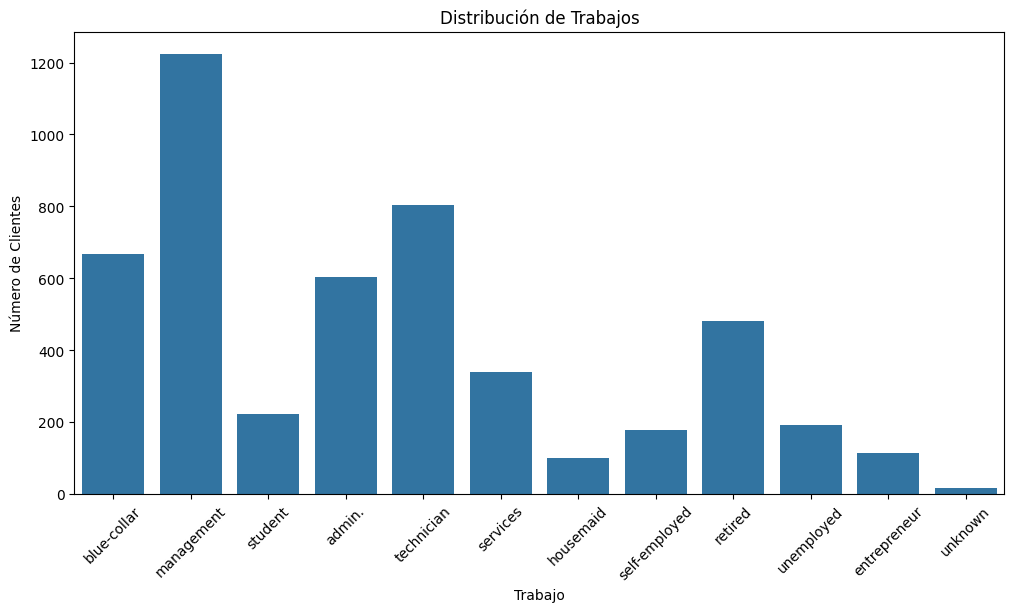

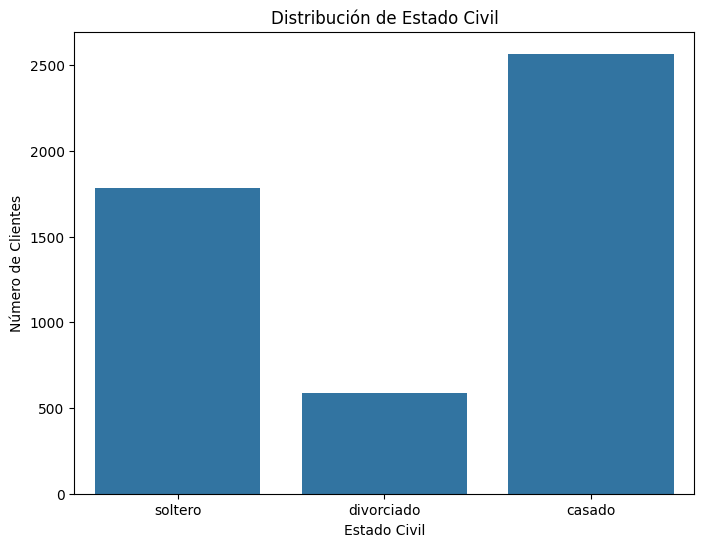

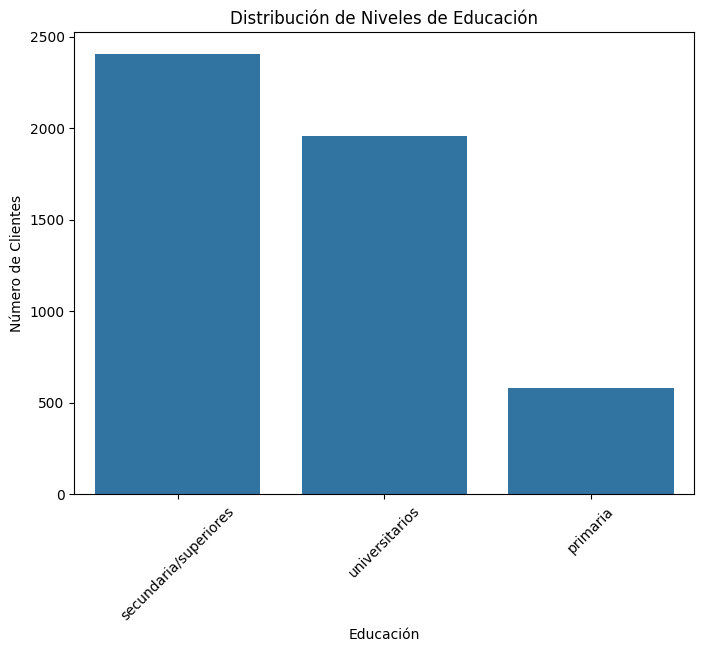

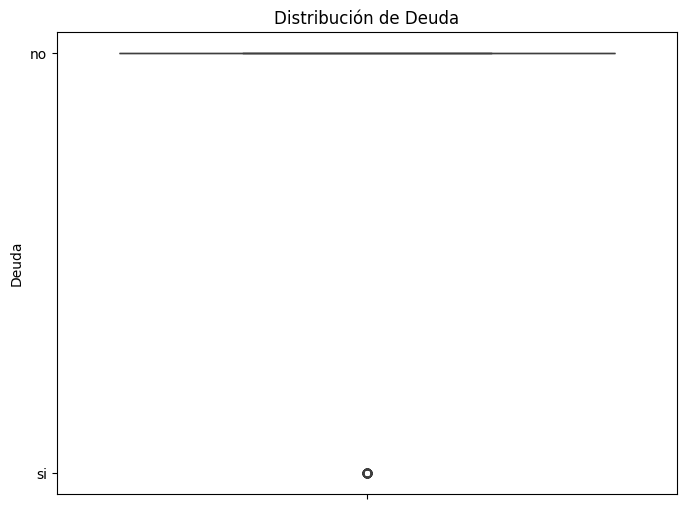

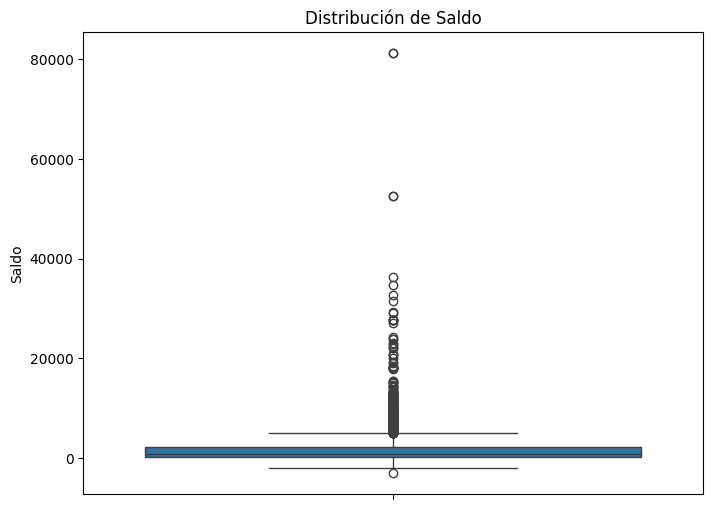

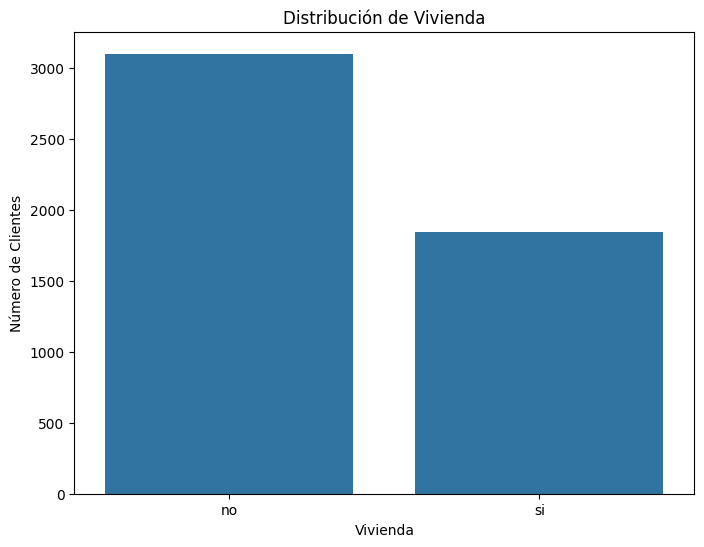

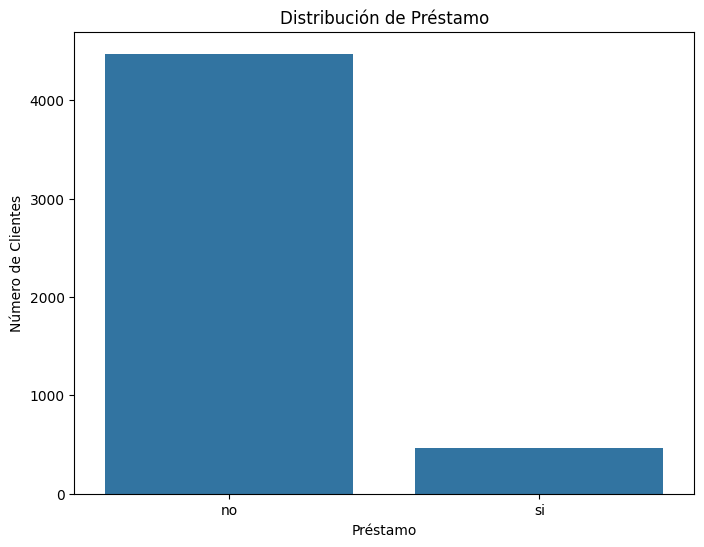

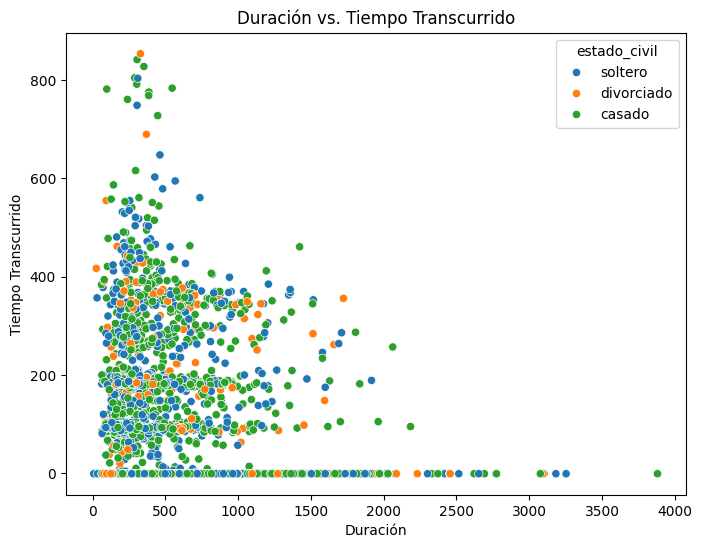

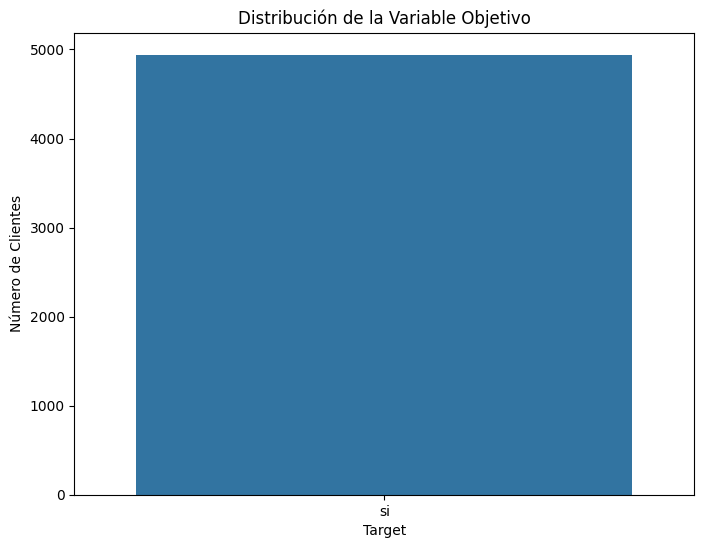

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df_target_si['edad'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de la distribución de trabajos
plt.figure(figsize=(12, 6))
sns.countplot(data=df_target_si, x='trabajo')
plt.title('Distribución de Trabajos')
plt.xlabel('Trabajo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras de la distribución de estado civil
plt.figure(figsize=(8, 6))
sns.countplot(data=df_target_si, x='estado_civil')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras de la distribución de educación
plt.figure(figsize=(8, 6))
sns.countplot(data=df_target_si, x='educacion')
plt.title('Distribución de Niveles de Educación')
plt.xlabel('Educación')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Gráfico de caja y bigotes de la deuda
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_target_si, y='deuda')
plt.title('Distribución de Deuda')
plt.ylabel('Deuda')
plt.show()

# Gráfico de caja y bigotes del saldo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_target_si, y='saldo')
plt.title('Distribución de Saldo')
plt.ylabel('Saldo')
plt.show()

# Gráfico de barras de la distribución de vivienda
plt.figure(figsize=(8, 6))
sns.countplot(data=df_target_si, x='vivienda')
plt.title('Distribución de Vivienda')
plt.xlabel('Vivienda')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras de la distribución de préstamo
plt.figure(figsize=(8, 6))
sns.countplot(data=df_target_si, x='prestamo')
plt.title('Distribución de Préstamo')
plt.xlabel('Préstamo')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de dispersión entre duración y tiempo_transcurrido
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_target_si, x='duracion', y='tiempo_transcurrido', hue='estado_civil')
plt.title('Duración vs. Tiempo Transcurrido')
plt.xlabel('Duración')
plt.ylabel('Tiempo Transcurrido')
plt.show()

# Gráfico de barras de la distribución de la variable objetivo (target)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_target_si, x='target')
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Target')
plt.ylabel('Número de Clientes')
plt.show()
